<figure style="float:right">
<a href="http://c51.lbl.gov/~walkloud/callat/">
    <img
    src="callat_logo.png"
    width="150"
    alt="CalLat logo"
    /img>
</a>
</figure>

# Jupyter notebook for CalLat gA project:

# sample correlation function fitter 

## Import libraries

In [1]:
%load_ext autoreload

In [2]:
from __future__ import print_function
%autoreload
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import tables as h5
import scipy as sp
import numpy as np
np.set_printoptions(linewidth=180)
import fit_functions as fit_fh
import iminuit as mn
import random
import tqdm
import theano as th
import theano.tensor as Tn
import fh_fit as fh
import fit_params as fitp
print("python  version:", sys.version)
print("numpy   version:", np.__version__)
print("scipy   version:", sp.__version__)
print("iminuit version:", mn.__version__)

python  version: 2.7.14 (default, Jan  6 2018, 12:15:00) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
numpy   version: 1.14.2
scipy   version: 1.0.1
iminuit version: 1.1.1


## Override default analysis parameters

In [3]:
ens = 'a15m130'
params = fitp.params
override = False
if override:# These parasm are for the a09m310 ensemble
    params['tau'] = 1
    params['bs'] = False
    params[ens]['seed'] = ens
    params[ens]['Nbs']  = 5000
    params[ens]['t_min_max'] = {
        'proton':[9,16],
        'gA'    :[3,12],
        'gV'    :[7,17]
    }
    params[ens]['plt_range'] = {
        'proton':[7,18,0.47,0.55],
        'gA'    :[0,15,1.1,1.5],
        'gV'    :[5,20,1.015,1.035]
    }
    params[ens]['fit_ini'] = {
        'E_0'   :.49241,
        'dE_10' :.408,
        'zs_0'  :2.2e-5,
        'zp_0'  :2.3e-3,
        'zs_1'  :1.3e-5,
        'zp_1'  :3.1e-3,
        'gA_00' :1.27,
        'gV_00' :1.02,
        'gA_11' :1.55,
        'gA_10' :-.01,
        'dAss_0':-4.7e-10,
        'dAps_0':-6.2e-8,
        'dAss_1':-4.2e-10,
        'dAps_1':1.5e-8,
        'gV_11' :1.06,
        'gV_10' :-0.066,
        'dVss_0':3.9e-10,
        'dVps_0':3.1e-8,
        'dVss_1':2.6e-11,
        'dVps_1':-4.1e-10,
    }

In [4]:
min_fh = fh.fit(ens,params)

FCN = 32.0940814535 
 TOTAL NCALL = 1899 
 NCALLS = 1899 
 
 
 EDM = 8.07757421273e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,E_0,7.197343e-01,2.737059e-03,0.000000e+00,0.000000e+00,,,
2,dE_10,7.361443e-01,3.328358e-02,0.000000e+00,0.000000e+00,0.0,10.0,
3,zs_0,4.588192e-04,3.415671e-06,0.000000e+00,0.000000e+00,0.0,1.0,
4,zp_0,1.265735e-02,9.910680e-05,0.000000e+00,0.000000e+00,,,
5,zs_1,3.827320e-04,4.663869e-06,0.000000e+00,0.000000e+00,0.0,1.0,
6,zp_1,4.778858e-03,7.043837e-05,0.000000e+00,0.000000e+00,,,
7,gA_00,1.262605e+00,4.280761e-02,0.000000e+00,0.000000e+00,,,
8,gA_11,4.851486e-01,6.002898e-01,0.000000e+00,0.000000e+00,-10.0,10.0,
9,gA_10,3.848041e+00,2.602401e-01,0.000000e+00,0.000000e+00,-5.0,5.0,
10,gV_00,9.952950e-01,2.290115e-02,0.000000e+00,0.000000e+00,,,


chi^2 = 32.0941, dof = 20, Q=0.0423


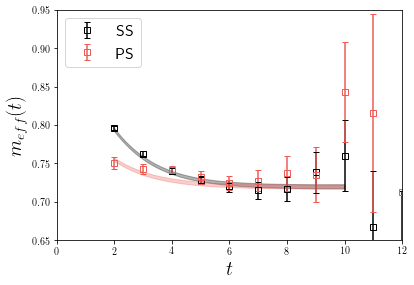

In [ ]:
l_ss = ['E_0','dE_10','zs_0','zs_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1']
fh.plot_results(ens,params,min_fh,'proton',[l_ss,l_ps],'two_pt')

In [ ]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gA_00','gA_11','gA_10','dAss_0','dAss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gA_00','gA_11','gA_10','dAps_0','dAps_1']
fh.plot_results(ens,params,min_fh,'gA',[l_ss,l_ps],'gA')

In [ ]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gV_00','gV_11','gV_10','dVss_0','dVss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gV_00','gV_11','gV_10','dVps_0','dVps_1']
fh.plot_results(ens,params,min_fh,'gV',[l_ss,l_ps],'gV')

<center>
    <span style="color: black; font-family: Helvetica; font-size: 2em">
        These calculations are made possible by
    </span>
</center>

| | |
|:---:|:---:|
| [<img src='incite_logo.png' width='200'/>](http://www.doeleadershipcomputing.org/)  | [<img src='olcf_logo.png' width='320'/>](https://www.olcf.ornl.gov/) |
| [<img src='llnl_logo.png' width='640' />](https://hpc.llnl.gov/) | [<img src='scidac_logo.png' width='350' />](http://www.scidac.gov/) |